In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

$N(\mu_1, \Sigma_1)$ and $N(\mu_2, \Sigma_2)$, define $C_1=\Sigma_1^{-1}$ and $C_2=\Sigma_2^{-1}$

then if log of conditional probabilities (given $x$) is quadrating with the following parameterization:
$$
<x, Ax> + <b, x> + c ,
$$

then the following transformation $\phi(x)$ can be obtained such that:

$$
<w, \phi(x)> = <x, Ax> + <b, x> + c.
$$

The transformation is $\phi(x_1, x_2) = (1, x_1, x_2, x_1^2, x_2^2, x_1x_2)$ for 2d points $(x_1, x_2)$, and
the parameters:
$$
A = \frac{1}{2}(C_2 - C_1)\\
b = \mu_1^TC_1 - \mu_2^TC_2\\
c= \frac{1}{2}\Big(\mu_2^TC_2\mu_2 - \mu_1^TC_1\mu_1) + \log\det(C_2) - \log\det(C_1)\Big),
$$
define the weights of a linear decision boundary in the transformed space (which is quadratic if plotted in 
the original space).

## logistic regression on $\phi$ space: $\phi(x_1, x_2) = (1, x_1, x_2, x_1^2, x_2^2, x_1x_2)$

$x=(x_1, x_2) \in \mathbb{R}^2$ and $\phi(x) \in \mathbb{R}^6$

run_0


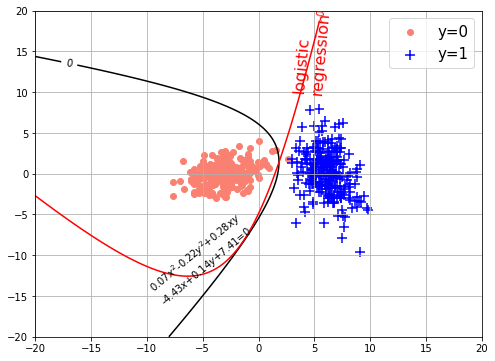

run_1


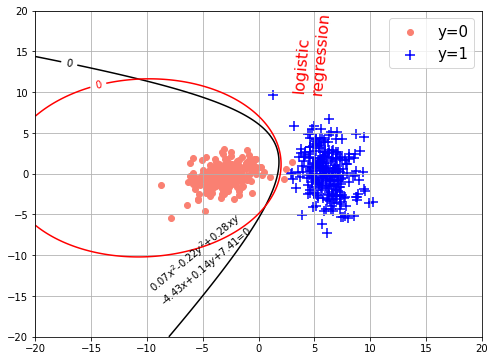

run_2


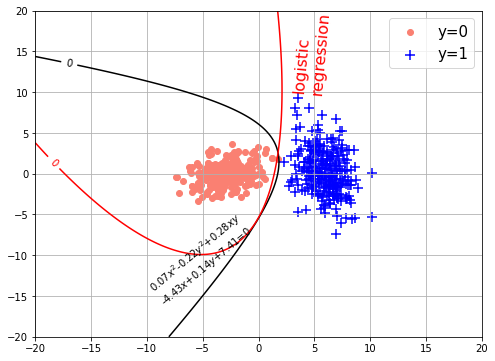

run_3


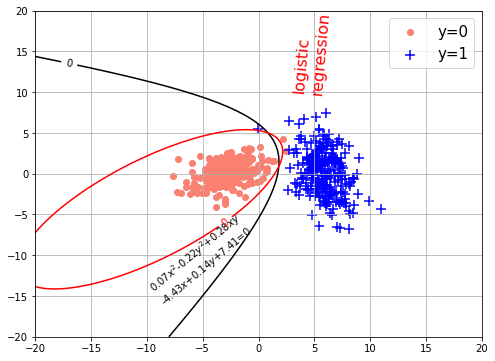

run_4


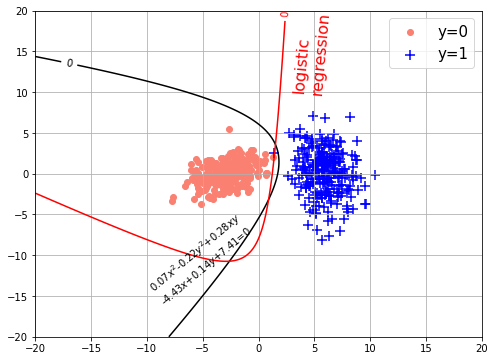

In [2]:
mu1 = np.array([-3., 0])
sigma1 = np.array([[3, 1.], [1, 2]])
mu2 = np.array([6., 0])
sigma2 = np.array([[2, -1.], [-1., 7]])

# calculate the parameters
C1 = np.linalg.inv(sigma1)
C2 = np.linalg.inv(sigma2)

# optimal parameter weights
A = 1/2 * (C2 - C1)
b = mu1@C1 - mu2@C2
c = 1/2 * (mu2@C2@mu2 - mu1@C1@mu1 + np.log(np.linalg.det(C2)) - np.log(np.linalg.det(C1)))

def f(x, y):
    # (x, y) is a point on the plane, f(x, y) = <x,Ax> + <b, x> + c
    return A[0,0]*x**2 + A[1,1]*y**2 + 2*A[0,1]*x*y + b[0]*x + b[1]*y + c

def phi(x, y):
    return np.column_stack([np.ones_like(x), x, y, x**2, y**2, x*y])


for _ in range(5):
    print(f'run_{_}')
    # generate some data
    N=500
    data1 = np.random.multivariate_normal(mu1, sigma1, size=N//2)
    data2 = np.random.multivariate_normal(mu2, sigma2, size=N//2)
    X = np.vstack([data1, data2])
    y = np.concatenate([np.zeros(N//2), np.ones(N//2)])

    phiX = phi(X[:, 0], X[:, 1])

    # fit logistic regression line on the new feature space
    lr = LogisticRegression(fit_intercept=False).fit(phiX, y) # intercept false because we have a 1 feature
    w_lr = lr.coef_[0]

    def logistic_regression_plane(x, y):
        w1, w2, w3, w4, w5, w6 = w_lr
        return w1 + w2*x + w3*y + w4*(x**2) + w5*(y**2) + w6*x*y


    delta = 0.01
    xx = np.arange(-20.0, 20.0, delta)
    yy = np.arange(-20.0, 20.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Z = f(XX, YY)
    LR = logistic_regression_plane(XX, YY)

    fig, ax = plt.subplots(figsize=(8, 6))
    CS = ax.contour(XX, YY, Z, [0.0], cmap='gray') # only plot contour f(x,y)=0 as that is the decision boundary
    ax.clabel(CS, inline=True, fontsize=10)

    CL = ax.contour(XX, YY, LR, [0.0], cmap='autumn') # again only plot the regression line in XYplane (z=0)
    ax.clabel(CL, inline=True, fontsize=10)

    ax.scatter(X[y==0,0], X[y==0,1], color='salmon', label='y=0')
    ax.scatter(X[y==1,0], X[y==1,1], color='blue', marker="+" ,s=100,label='y=1') 

    ax.annotate('logistic\nregression', (3,10), fontsize=16, color='red', rotation=85)
    ax.annotate(f'{A[0,0]:.2f}$x^2${A[1,1]:.2f}$y^2$+{2*A[0,1]:.2f}$xy$\n{b[0]:.2f}$x$+{b[1]:.2f}$y$+{c:.2f}=0', (-10,-16), rotation=40)

    xlim=20; ylim=20;
    ax.legend(fontsize=15); ax.grid(); ax.set_xlim(-xlim, xlim); ax.set_ylim(-ylim, ylim);

    plt.show()

## Observations:
As we can see across different runs, depending on the data, logistic regression converges to close decision 
boundaries and is often close to the (optimal?) decision boundary in black given we know the parameters of the
gaussians.

In [3]:
f'{A[0,0]:.2f}$x^2${A[1,1]:.2f}$y^2$+{2*A[0,1]:.2f}$xy${b[0]:.2f}$x$+{b[1]:.2f}$y$+{c:.2f}'

'0.07$x^2$-0.22$y^2$+0.28$xy$-4.43$x$+0.14$y$+7.41'

In [4]:
w_lr

array([-2.34920775,  1.86225101, -0.27257345,  0.13309837, -0.03951394,
        0.0549724 ])

In [5]:
def phi(x, y):
    return np.column_stack([np.ones_like(x), x, y, x**2, y**2, x*y])
phi(X[:, 0], X[:, 1])[0], X[0]

(array([1.        , 0.05161895, 1.478804  , 0.00266452, 2.18686128,
        0.07633432]),
 array([0.05161895, 1.478804  ]))

## logistic regression on original input space

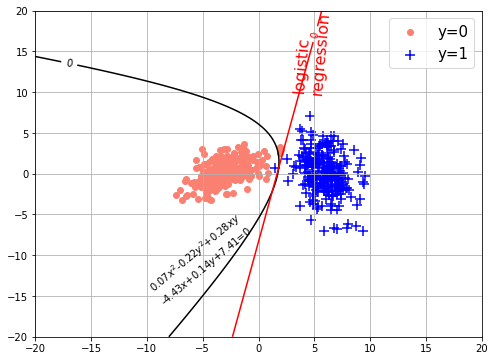

In [6]:
mu1 = np.array([-3., 0])
sigma1 = np.array([[3, 1.], [1, 2]])
mu2 = np.array([6., 0])
sigma2 = np.array([[2, -1.], [-1., 7]])

# calculate the parameters
C1 = np.linalg.inv(sigma1)
C2 = np.linalg.inv(sigma2)

A = 1/2 * (C2 - C1)
b = mu1@C1 - mu2@C2
c = 1/2 * (mu2@C2@mu2 - mu1@C1@mu1 + np.log(np.linalg.det(C2)) - np.log(np.linalg.det(C1)))

def f(x, y):
    # (x, y) is a point on the plane, f(x, y) = <x,Ax> + <b, x> + c
    return A[0,0]*x**2 + A[1,1]*y**2 + 2*A[0,1]*x*y + b[0]*x + b[1]*y + c


# generate some data
N=500
data1 = np.random.multivariate_normal(mu1, sigma1, size=N//2)
data2 = np.random.multivariate_normal(mu2, sigma2, size=N//2)
X = np.vstack([data1, data2])
y = np.concatenate([np.zeros(N//2), np.ones(N//2)])

# fit logistic regression line on the original feature space
lr = LogisticRegression().fit(X, y)
w_lr, b_lr = lr.coef_[0], lr.intercept_[0]

def logistic_regression_plane(x, y):
    w1, w2 = w_lr[0], w_lr[1]
    b = b_lr
    return w1*x + w2*y + b


delta = 0.01
xx = np.arange(-20.0, 20.0, delta)
yy = np.arange(-20.0, 20.0, delta)
XX, YY = np.meshgrid(xx, yy)
Z = f(XX, YY)
LR = logistic_regression_plane(XX, YY)

fig, ax = plt.subplots(figsize=(8, 6))
CS = ax.contour(XX, YY, Z, [0.0], cmap='gray') # only plot contour f(x,y)=0 as that is the decision boundary
ax.clabel(CS, inline=True, fontsize=10)

CL = ax.contour(XX, YY, LR, [0.0], cmap='autumn') # again only plot the regression line in XYplane (z=0)
ax.clabel(CL, inline=True, fontsize=10)

ax.scatter(X[y==0,0], X[y==0,1], color='salmon', label='y=0')
ax.scatter(X[y==1,0], X[y==1,1], color='blue', marker="+" ,s=100,label='y=1') 

ax.annotate('logistic\nregression', (3,10), fontsize=16, color='red', rotation=85)
ax.annotate(f'{A[0,0]:.2f}$x^2${A[1,1]:.2f}$y^2$+{2*A[0,1]:.2f}$xy$\n{b[0]:.2f}$x$+{b[1]:.2f}$y$+{c:.2f}=0', (-10,-16), rotation=40)

xlim=20; ylim=20;
ax.legend(fontsize=15); ax.grid(); ax.set_xlim(-xlim, xlim); ax.set_ylim(-ylim, ylim);

plt.show()

## Question 1 when the variances are equal -- here we use $\phi(x_1, x_2)=\{1, x_1, x_2\}$

In [ ]:
# classification in \phi(x) space
# 1/(1+np.exp(-f(X[:, 0], X[:, 1]))) > 0.5

run_0


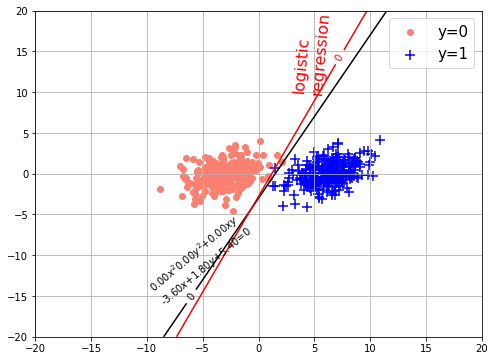

run_1


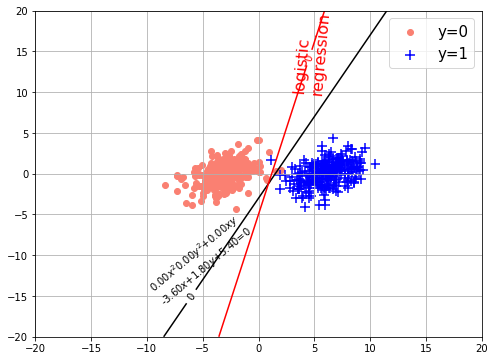

run_2


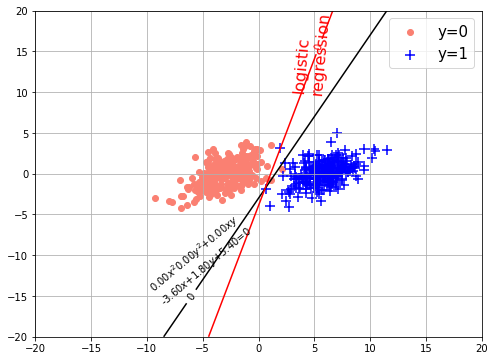

run_3


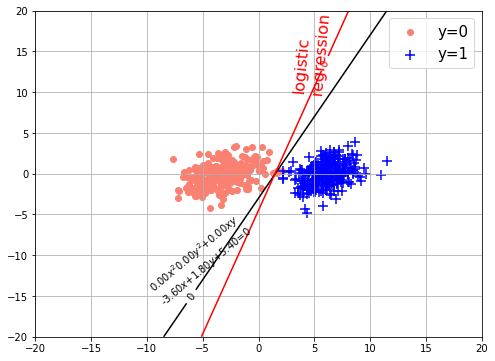

run_4


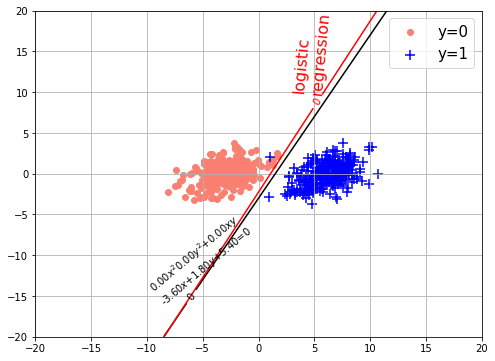

In [9]:
mu1 = np.array([-3., 0])
sigma1 = np.array([[3, 1.], [1, 2]])
mu2 = np.array([6., 0])
sigma2 = sigma1#np.array([[2, -1.], [-1., 7]])

# calculate the parameters
C1 = np.linalg.inv(sigma1)
C2 = np.linalg.inv(sigma2)

# optimal parameter weights
A = 1/2 * (C2 - C1)
b = mu1@C1 - mu2@C2
c = 1/2 * (mu2@C2@mu2 - mu1@C1@mu1 + np.log(np.linalg.det(C2)) - np.log(np.linalg.det(C1)))

def f(x, y):
    # (x, y) is a point on the plane, f(x, y) = <x,Ax> + <b, x> + c
    return A[0,0]*x**2 + A[1,1]*y**2 + 2*A[0,1]*x*y + b[0]*x + b[1]*y + c

def phi(x, y):
    return np.column_stack([np.ones_like(x), x, y])


for _ in range(5):
    print(f'run_{_}')
    # generate some data
    N=500
    data1 = np.random.multivariate_normal(mu1, sigma1, size=N//2)
    data2 = np.random.multivariate_normal(mu2, sigma2, size=N//2)
    X = np.vstack([data1, data2])
    y = np.concatenate([np.zeros(N//2), np.ones(N//2)])

    phiX = phi(X[:, 0], X[:, 1])

    # fit logistic regression line on the new feature space
    lr = LogisticRegression(fit_intercept=False).fit(phiX, y) # intercept false because we have a 1 feature
    w_lr = lr.coef_[0]

    def logistic_regression_plane(x, y):
        w1, w2, w3 = w_lr
        return w1 + w2*x + w3*y


    delta = 0.01
    xx = np.arange(-20.0, 20.0, delta)
    yy = np.arange(-20.0, 20.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Z = f(XX, YY)
    LR = logistic_regression_plane(XX, YY)

    fig, ax = plt.subplots(figsize=(8, 6))
    CS = ax.contour(XX, YY, Z, [0.0], cmap='gray') # only plot contour f(x,y)=0 as that is the decision boundary
    ax.clabel(CS, inline=True, fontsize=10)

    CL = ax.contour(XX, YY, LR, [0.0], cmap='autumn') # again only plot the regression line in XYplane (z=0)
    ax.clabel(CL, inline=True, fontsize=10)

    ax.scatter(X[y==0,0], X[y==0,1], color='salmon', label='y=0')
    ax.scatter(X[y==1,0], X[y==1,1], color='blue', marker="+" ,s=100,label='y=1') 

    ax.annotate('logistic\nregression', (3,10), fontsize=16, color='red', rotation=85)
    ax.annotate(f'{A[0,0]:.2f}$x^2${A[1,1]:.2f}$y^2$+{2*A[0,1]:.2f}$xy$\n{b[0]:.2f}$x$+{b[1]:.2f}$y$+{c:.2f}=0', (-10,-16), rotation=40)

    xlim=20; ylim=20;
    ax.legend(fontsize=15); ax.grid(); ax.set_xlim(-xlim, xlim); ax.set_ylim(-ylim, ylim);

    plt.show()